In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_tumor_data_features.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_X = sc.fit_transform(df)

In [7]:
from sklearn.decomposition import PCA

#help(PCA)

pca2 = PCA(n_components=2)
principal_components = pca2.fit_transform(sc_X)

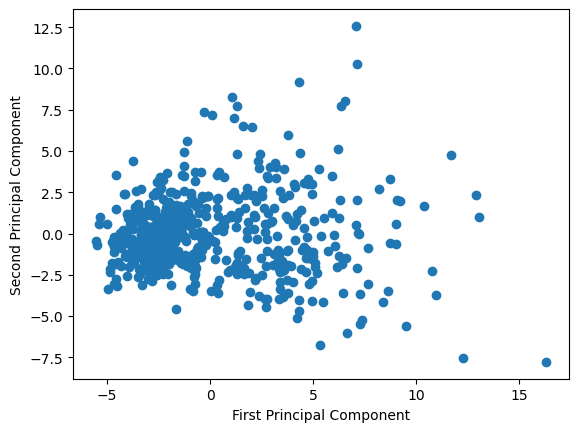

In [9]:
plt.scatter(principal_components[:,0],principal_components[:,1])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

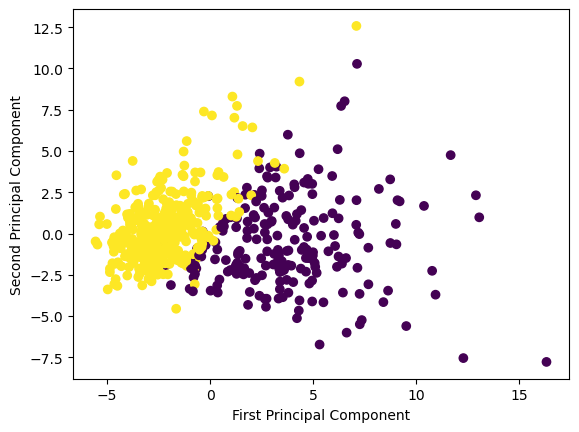

In [11]:
from sklearn.datasets import load_breast_cancer

cancer_df = load_breast_cancer()
plt.scatter(principal_components[:,0],principal_components[:,1], c=cancer_df['target'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

### Model Attributes


In [12]:
pca2.n_components

2

In [13]:
pca2.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [18]:
df_components= pd.DataFrame(pca2.components_,index=['PC1','PC2'],columns=df.columns)


<Axes: >

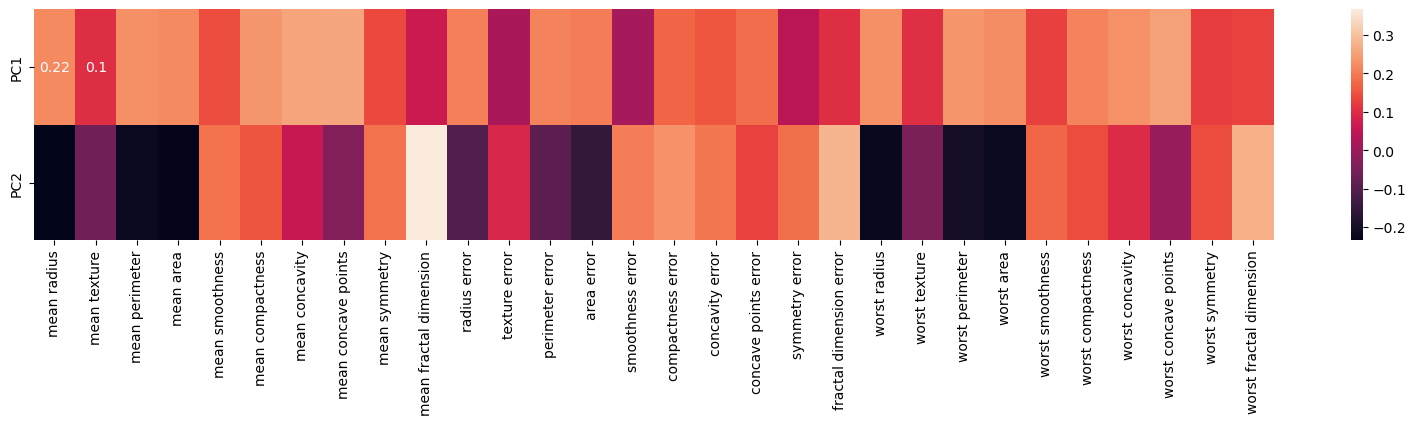

In [20]:
plt.figure(figsize=(20,3))
sns.heatmap(df_components,annot=True)

In [21]:
pca2.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [22]:
np.sum(pca2.explained_variance_ratio_)

0.6324320765155937

In [24]:
#Thought Exercise: Setting PCA equal to number of features
pca30 = PCA(n_components=30)
principal_components_30 = pca30.fit(sc_X)

In [25]:
principal_components_30.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [26]:
np.sum(principal_components_30.explained_variance_ratio_)

1.0

In [27]:
explained_variance = []

for n in range(1,31):
    pca = PCA(n_components=n)
    pca.fit(sc_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

In [28]:
explained_variance

[0.4427202560752636,
 0.6324320765155942,
 0.7263637090898598,
 0.7923850582437529,
 0.8473427431680505,
 0.8875879635643299,
 0.9100953006952762,
 0.9259825386908753,
 0.9398790324378465,
 0.9515688143268358,
 0.9613660042107747,
 0.9700713832169982,
 0.9781166330910694,
 0.9833502905427769,
 0.986488122698482,
 0.9891502160147705,
 0.9911301840050241,
 0.9928841434552499,
 0.9945333965144757,
 0.9955720432628138,
 0.9965711397265139,
 0.9974857864775681,
 0.9982971477364673,
 0.998898981303139,
 0.9994150236823042,
 0.9996876116777816,
 0.9999176271402876,
 0.9999706050693258,
 0.9999955651725727,
 1.0]

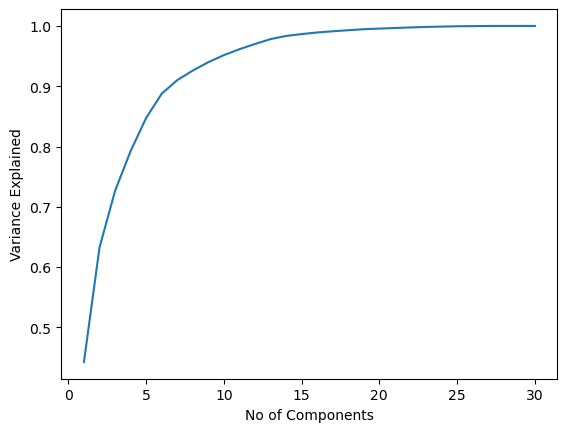

In [30]:
plt.plot(range(1,31),explained_variance)
plt.xlabel('No of Components')
plt.ylabel('Variance Explained')
plt.show()